Algorithm to test time-domain cleaning using statistical methods to identify RFI.

In [1]:
#Import Modules
import psrchive
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.cluster.vq import kmeans, vq
import scipy.stats as stats
from matplotlib import colors

In [2]:
#Load in the raw data and transform it
RFI_File1 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0010.ar')
RFI_File1.tscrunch()
RFI_File1.dedisperse()
RFI_File1.pscrunch()
RFI_File1.remove_baseline()
File1_Data = RFI_File1.get_data()

#Load in the raw data and transform it
RFI_File2 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0011.ar')
RFI_File2.tscrunch()
RFI_File2.dedisperse()
RFI_File2.pscrunch()
RFI_File2.remove_baseline()
File2_Data = RFI_File2.get_data()

#Load in the raw data and transform it
RFI_File3 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0012.ar')
RFI_File3.tscrunch()
RFI_File3.dedisperse()
RFI_File3.pscrunch()
RFI_File3.remove_baseline()
File3_Data = RFI_File3.get_data()

#Load in the raw data and transform it
RFI_File4 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0013.ar')
RFI_File4.tscrunch()
RFI_File4.dedisperse()
RFI_File4.pscrunch()
RFI_File4.remove_baseline()
File4_Data = RFI_File4.get_data()

#Load in the raw data and transform it
RFI_File5 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0014.ar')
RFI_File5.tscrunch()
RFI_File5.dedisperse()
RFI_File5.pscrunch()
RFI_File5.remove_baseline()
File5_Data = RFI_File5.get_data()

#Load in the raw data and transform it
RFI_File6 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0015.ar')
RFI_File6.tscrunch()
RFI_File6.dedisperse()
RFI_File6.pscrunch()
RFI_File6.remove_baseline()
File6_Data = RFI_File6.get_data()

#Load in the raw data and transform it
RFI_File7 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0016.ar')
RFI_File7.tscrunch()
RFI_File7.dedisperse()
RFI_File7.pscrunch()
RFI_File7.remove_baseline()
File7_Data = RFI_File7.get_data()

#Load in the raw data and transform it
RFI_File8 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0017.ar')
RFI_File8.tscrunch()
RFI_File8.dedisperse()
RFI_File8.pscrunch()
RFI_File8.remove_baseline()
File8_Data = RFI_File8.get_data()

#Load in the raw data and transform it
RFI_File9 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0018.ar')
RFI_File9.tscrunch()
RFI_File9.dedisperse()
RFI_File9.pscrunch()
RFI_File9.remove_baseline()
File9_Data = RFI_File9.get_data()

#Load in the raw data and transform it
RFI_File10 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0019.ar')
RFI_File10.tscrunch()
RFI_File10.dedisperse()
RFI_File10.pscrunch()
RFI_File10.remove_baseline()
File10_Data = RFI_File10.get_data()

#Load in the raw data and transform it
RFI_File11 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0020.ar')
RFI_File11.tscrunch()
RFI_File11.dedisperse()
RFI_File11.pscrunch()
RFI_File11.remove_baseline()
File11_Data = RFI_File11.get_data()

#Load in the raw data and transform it
RFI_File12 = psrchive.Archive_load('/homes/jtremblay/B0355+54_Data/timing1/13:27:06_0021.ar')
RFI_File12.tscrunch()
RFI_File12.dedisperse()
RFI_File12.pscrunch()
RFI_File12.remove_baseline()
File12_Data = RFI_File12.get_data()

In [3]:
print(np.shape(File12_Data))

(1, 1, 512, 1024)


In [4]:
freq_mhz_RFI_table = RFI_File1.get_frequency_table()
freq_mhz_RFI = freq_mhz_RFI_table[0]
print(np.shape(freq_mhz_RFI_table))

(1, 512)


In [5]:
#Select the frequency channel to plot
freq_pulse1 = File1_Data[0,0,:]
freq_pulse2 = File2_Data[0,0,:]
freq_pulse3 = File3_Data[0,0,:]
freq_pulse4 = File4_Data[0,0,:]
freq_pulse5 = File5_Data[0,0,:]
freq_pulse6 = File6_Data[0,0,:]
freq_pulse7 = File7_Data[0,0,:]
freq_pulse8 = File8_Data[0,0,:]
freq_pulse9 = File9_Data[0,0,:]
freq_pulse10 = File10_Data[0,0,:]
freq_pulse11 = File11_Data[0,0,:]
freq_pulse12 = File12_Data[0,0,:]

print(np.shape(freq_pulse1))

#Create a range of frequencies     
freq_list_RFI = np.array(range(0,512,1))

#Create a range of zeros for the data that is removed.
buckets = [np.nan] * 130

##Select only off-pulse channels
freq_chn_RFI1 = []
freq_chn_RFI2 = []
freq_chn_RFI3 = []
freq_chn_RFI4 = []
freq_chn_RFI5 = []
freq_chn_RFI6 = []
freq_chn_RFI7 = []
freq_chn_RFI8 = []
freq_chn_RFI9 = []
freq_chn_RFI10 = []
freq_chn_RFI11 = []
freq_chn_RFI12 = []

for i in range(0,512):
    freq_chn_RFI1.append(np.concatenate((freq_pulse1[i][:790], buckets, freq_pulse1[i][920:])))
    freq_chn_RFI2.append(np.concatenate((freq_pulse2[i][:790], buckets, freq_pulse2[i][920:])))
    freq_chn_RFI3.append(np.concatenate((freq_pulse3[i][:790], buckets, freq_pulse3[i][920:])))
    freq_chn_RFI4.append(np.concatenate((freq_pulse4[i][:790], buckets, freq_pulse4[i][920:])))
    freq_chn_RFI5.append(np.concatenate((freq_pulse5[i][:790], buckets, freq_pulse5[i][920:])))
    freq_chn_RFI6.append(np.concatenate((freq_pulse6[i][:790], buckets, freq_pulse6[i][920:])))
    freq_chn_RFI7.append(np.concatenate((freq_pulse7[i][:790], buckets, freq_pulse7[i][920:])))
    freq_chn_RFI8.append(np.concatenate((freq_pulse8[i][:790], buckets, freq_pulse8[i][920:])))
    freq_chn_RFI9.append(np.concatenate((freq_pulse9[i][:790], buckets, freq_pulse9[i][920:])))
    freq_chn_RFI10.append(np.concatenate((freq_pulse10[i][:790], buckets, freq_pulse10[i][920:])))
    freq_chn_RFI11.append(np.concatenate((freq_pulse11[i][:790], buckets, freq_pulse11[i][920:])))
    freq_chn_RFI12.append(np.concatenate((freq_pulse12[i][:790], buckets, freq_pulse12[i][920:])))
    #freq_chn_RFI.append(all_freq_chn_RFI[i][20:920])
print(len(freq_chn_RFI1))

(512, 1024)
512


In [6]:
#Create lists
median_chn_RFI1 = []
mean_chn_RFI1 = []
std_chn_RFI1 = []
sum_chn_RFI1 = []
kurtosis_chn_RFI1 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI1.append(np.nanmedian(freq_chn_RFI1[i]))
    #Calculate mean for every channel
    mean_chn_RFI1.append(np.nanmean(freq_chn_RFI1[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI1.append(np.nanstd(freq_chn_RFI1[i]))
    #Calculate sum for every channel
    sum_chn_RFI1.append(np.nansum(freq_chn_RFI1[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI1.append(stats.kurtosis(freq_chn_RFI1[i], nan_policy='omit'))
    
#Create lists
median_chn_RFI2 = []
mean_chn_RFI2 = []
std_chn_RFI2 = []
sum_chn_RFI2 = []
kurtosis_chn_RFI2 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI2.append(np.nanmedian(freq_chn_RFI2[i]))
    #Calculate mean for every channel
    mean_chn_RFI2.append(np.nanmean(freq_chn_RFI2[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI2.append(np.nanstd(freq_chn_RFI2[i]))
    #Calculate sum for every channel
    sum_chn_RFI2.append(np.nansum(freq_chn_RFI2[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI2.append(stats.kurtosis(freq_chn_RFI2[i], nan_policy='omit'))

#Create lists
median_chn_RFI3 = []
mean_chn_RFI3 = []
std_chn_RFI3 = []
sum_chn_RFI3 = []
kurtosis_chn_RFI3 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI3.append(np.nanmedian(freq_chn_RFI3[i]))
    #Calculate mean for every channel
    mean_chn_RFI3.append(np.nanmean(freq_chn_RFI3[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI3.append(np.nanstd(freq_chn_RFI3[i]))
    #Calculate sum for every channel
    sum_chn_RFI3.append(np.nansum(freq_chn_RFI3[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI3.append(stats.kurtosis(freq_chn_RFI3[i], nan_policy='omit'))
    
#Create lists
median_chn_RFI4 = []
mean_chn_RFI4 = []
std_chn_RFI4 = []
sum_chn_RFI4 = []
kurtosis_chn_RFI4 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI4.append(np.nanmedian(freq_chn_RFI4[i]))
    #Calculate mean for every channel
    mean_chn_RFI4.append(np.nanmean(freq_chn_RFI4[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI4.append(np.nanstd(freq_chn_RFI4[i]))
    #Calculate sum for every channel
    sum_chn_RFI4.append(np.nansum(freq_chn_RFI4[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI4.append(stats.kurtosis(freq_chn_RFI4[i], nan_policy='omit'))
    
#Create lists
median_chn_RFI5 = []
mean_chn_RFI5 = []
std_chn_RFI5 = []
sum_chn_RFI5 = []
kurtosis_chn_RFI5 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI5.append(np.nanmedian(freq_chn_RFI5[i]))
    #Calculate mean for every channel
    mean_chn_RFI5.append(np.nanmean(freq_chn_RFI5[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI5.append(np.nanstd(freq_chn_RFI5[i]))
    #Calculate sum for every channel
    sum_chn_RFI5.append(np.nansum(freq_chn_RFI5[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI5.append(stats.kurtosis(freq_chn_RFI5[i], nan_policy='omit'))
    
#Create lists
median_chn_RFI6 = []
mean_chn_RFI6 = []
std_chn_RFI6 = []
sum_chn_RFI6 = []
kurtosis_chn_RFI6 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI6.append(np.nanmedian(freq_chn_RFI6[i]))
    #Calculate mean for every channel
    mean_chn_RFI6.append(np.nanmean(freq_chn_RFI6[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI6.append(np.nanstd(freq_chn_RFI6[i]))
    #Calculate sum for every channel
    sum_chn_RFI6.append(np.nansum(freq_chn_RFI6[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI6.append(stats.kurtosis(freq_chn_RFI6[i], nan_policy='omit'))
    
#Create lists
median_chn_RFI7 = []
mean_chn_RFI7 = []
std_chn_RFI7 = []
sum_chn_RFI7 = []
kurtosis_chn_RFI7 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI7.append(np.nanmedian(freq_chn_RFI7[i]))
    #Calculate mean for every channel
    mean_chn_RFI7.append(np.nanmean(freq_chn_RFI7[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI7.append(np.nanstd(freq_chn_RFI7[i]))
    #Calculate sum for every channel
    sum_chn_RFI7.append(np.nansum(freq_chn_RFI7[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI7.append(stats.kurtosis(freq_chn_RFI7[i], nan_policy='omit'))
    
#Create lists
median_chn_RFI8 = []
mean_chn_RFI8 = []
std_chn_RFI8 = []
sum_chn_RFI8 = []
kurtosis_chn_RFI8 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI8.append(np.nanmedian(freq_chn_RFI8[i]))
    #Calculate mean for every channel
    mean_chn_RFI8.append(np.nanmean(freq_chn_RFI8[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI8.append(np.nanstd(freq_chn_RFI8[i]))
    #Calculate sum for every channel
    sum_chn_RFI8.append(np.nansum(freq_chn_RFI8[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI8.append(stats.kurtosis(freq_chn_RFI8[i], nan_policy='omit'))

#Create lists
median_chn_RFI9 = []
mean_chn_RFI9 = []
std_chn_RFI9 = []
sum_chn_RFI9 = []
kurtosis_chn_RFI9 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI9.append(np.nanmedian(freq_chn_RFI9[i]))
    #Calculate mean for every channel
    mean_chn_RFI9.append(np.nanmean(freq_chn_RFI9[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI9.append(np.nanstd(freq_chn_RFI9[i]))
    #Calculate sum for every channel
    sum_chn_RFI9.append(np.nansum(freq_chn_RFI9[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI9.append(stats.kurtosis(freq_chn_RFI9[i], nan_policy='omit'))

#Create lists
median_chn_RFI10 = []
mean_chn_RFI10 = []
std_chn_RFI10 = []
sum_chn_RFI10 = []
kurtosis_chn_RFI10 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI10.append(np.nanmedian(freq_chn_RFI10[i]))
    #Calculate mean for every channel
    mean_chn_RFI10.append(np.nanmean(freq_chn_RFI10[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI10.append(np.nanstd(freq_chn_RFI10[i]))
    #Calculate sum for every channel
    sum_chn_RFI10.append(np.nansum(freq_chn_RFI10[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI10.append(stats.kurtosis(freq_chn_RFI10[i], nan_policy='omit'))

#Create lists
median_chn_RFI11 = []
mean_chn_RFI11 = []
std_chn_RFI11 = []
sum_chn_RFI11 = []
kurtosis_chn_RFI11 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI11.append(np.nanmedian(freq_chn_RFI11[i]))
    #Calculate mean for every channel
    mean_chn_RFI11.append(np.nanmean(freq_chn_RFI11[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI11.append(np.nanstd(freq_chn_RFI11[i]))
    #Calculate sum for every channel
    sum_chn_RFI11.append(np.nansum(freq_chn_RFI11[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI11.append(stats.kurtosis(freq_chn_RFI11[i], nan_policy='omit'))

#Create lists
median_chn_RFI12 = []
mean_chn_RFI12 = []
std_chn_RFI12 = []
sum_chn_RFI12 = []
kurtosis_chn_RFI12 = []

for i in range(0,512):
    #Calculate median for every channel
    median_chn_RFI12.append(np.nanmedian(freq_chn_RFI12[i]))
    #Calculate mean for every channel
    mean_chn_RFI12.append(np.nanmean(freq_chn_RFI12[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI12.append(np.nanstd(freq_chn_RFI12[i]))
    #Calculate sum for every channel
    sum_chn_RFI12.append(np.nansum(freq_chn_RFI12[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI12.append(stats.kurtosis(freq_chn_RFI12[i], nan_policy='omit'))

Get Pulse phase

In [7]:
off_pulse_list_RFI1 = []
off_pulse_list_RFI2 = []
off_pulse_list_RFI3 = []
off_pulse_list_RFI4 = []
off_pulse_list_RFI5 = []
off_pulse_list_RFI6 = []
off_pulse_list_RFI7 = []
off_pulse_list_RFI8 = []
off_pulse_list_RFI9 = []
off_pulse_list_RFI10 = []
off_pulse_list_RFI11 = []
off_pulse_list_RFI12 = []

#Select only off-pulse channels
for i in range(0,512):
    off_pulse_list_RFI1.append(np.concatenate((freq_pulse1[i][:790], buckets, freq_pulse1[i][920:])))
    off_pulse_list_RFI2.append(np.concatenate((freq_pulse2[i][:790], buckets, freq_pulse2[i][920:])))
    off_pulse_list_RFI3.append(np.concatenate((freq_pulse3[i][:790], buckets, freq_pulse3[i][920:])))
    off_pulse_list_RFI4.append(np.concatenate((freq_pulse4[i][:790], buckets, freq_pulse4[i][920:])))
    off_pulse_list_RFI5.append(np.concatenate((freq_pulse5[i][:790], buckets, freq_pulse5[i][920:])))
    off_pulse_list_RFI6.append(np.concatenate((freq_pulse6[i][:790], buckets, freq_pulse6[i][920:])))
    off_pulse_list_RFI7.append(np.concatenate((freq_pulse7[i][:790], buckets, freq_pulse7[i][920:])))
    off_pulse_list_RFI8.append(np.concatenate((freq_pulse8[i][:790], buckets, freq_pulse8[i][920:])))
    off_pulse_list_RFI9.append(np.concatenate((freq_pulse9[i][:790], buckets, freq_pulse9[i][920:])))
    off_pulse_list_RFI10.append(np.concatenate((freq_pulse10[i][:790], buckets, freq_pulse10[i][920:])))
    off_pulse_list_RFI11.append(np.concatenate((freq_pulse11[i][:790], buckets, freq_pulse11[i][920:])))
    off_pulse_list_RFI12.append(np.concatenate((freq_pulse12[i][:790], buckets, freq_pulse12[i][920:])))
    
#Transpose the original array
bin_list_RFI1 = np.transpose(off_pulse_list_RFI1)
bin_list_RFI2 = np.transpose(off_pulse_list_RFI2)
bin_list_RFI3 = np.transpose(off_pulse_list_RFI3)
bin_list_RFI4 = np.transpose(off_pulse_list_RFI4)
bin_list_RFI5 = np.transpose(off_pulse_list_RFI5)
bin_list_RFI6 = np.transpose(off_pulse_list_RFI6)
bin_list_RFI7 = np.transpose(off_pulse_list_RFI7)
bin_list_RFI8 = np.transpose(off_pulse_list_RFI8)
bin_list_RFI9 = np.transpose(off_pulse_list_RFI9)
bin_list_RFI10 = np.transpose(off_pulse_list_RFI10)
bin_list_RFI11 = np.transpose(off_pulse_list_RFI11)
bin_list_RFI12 = np.transpose(off_pulse_list_RFI12)

print(len(bin_list_RFI1))

1024


In [8]:
#Create an array to use as the x-axis
bin_nums = np.asarray(range(0,1024))
print(np.shape(bin_nums))

(1024,)


In [9]:
#Create lists
mean_bin_RFI1 = []
median_bin_RFI1 = []
std_bin_RFI1 = []
sum_bin_RFI1 = []
kurtosis_bin_RFI1 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI1.append(np.nanmean(bin_list_RFI1[i]))
    #Calculate the median for each bin
    median_bin_RFI1.append(np.nanmedian(bin_list_RFI1[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI1.append(np.nanstd(bin_list_RFI1[i]))
    #Calculate the sum for each bin
    sum_bin_RFI1.append(np.nansum(bin_list_RFI1[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI1.append(stats.kurtosis(bin_list_RFI1[i], nan_policy='omit'))

#Create lists
mean_bin_RFI2 = []
median_bin_RFI2 = []
std_bin_RFI2 = []
sum_bin_RFI2 = []
kurtosis_bin_RFI2 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI2.append(np.nanmean(bin_list_RFI2[i]))
    #Calculate the median for each bin
    median_bin_RFI2.append(np.nanmedian(bin_list_RFI2[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI2.append(np.nanstd(bin_list_RFI2[i]))
    #Calculate the sum for each bin
    sum_bin_RFI2.append(np.nansum(bin_list_RFI2[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI2.append(stats.kurtosis(bin_list_RFI2[i], nan_policy='omit'))

#Create lists
mean_bin_RFI3 = []
median_bin_RFI3 = []
std_bin_RFI3 = []
sum_bin_RFI3 = []
kurtosis_bin_RFI3 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI3.append(np.nanmean(bin_list_RFI3[i]))
    #Calculate the median for each bin
    median_bin_RFI3.append(np.nanmedian(bin_list_RFI3[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI3.append(np.nanstd(bin_list_RFI3[i]))
    #Calculate the sum for each bin
    sum_bin_RFI3.append(np.nansum(bin_list_RFI3[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI3.append(stats.kurtosis(bin_list_RFI3[i], nan_policy='omit'))

#Create lists
mean_bin_RFI4 = []
median_bin_RFI4 = []
std_bin_RFI4 = []
sum_bin_RFI4 = []
kurtosis_bin_RFI4 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI4.append(np.nanmean(bin_list_RFI4[i]))
    #Calculate the median for each bin
    median_bin_RFI4.append(np.nanmedian(bin_list_RFI4[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI4.append(np.nanstd(bin_list_RFI4[i]))
    #Calculate the sum for each bin
    sum_bin_RFI4.append(np.nansum(bin_list_RFI4[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI4.append(stats.kurtosis(bin_list_RFI4[i], nan_policy='omit'))

#Create lists
mean_bin_RFI5 = []
median_bin_RFI5 = []
std_bin_RFI5 = []
sum_bin_RFI5 = []
kurtosis_bin_RFI5 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI5.append(np.nanmean(bin_list_RFI5[i]))
    #Calculate the median for each bin
    median_bin_RFI5.append(np.nanmedian(bin_list_RFI5[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI5.append(np.nanstd(bin_list_RFI5[i]))
    #Calculate the sum for each bin
    sum_bin_RFI5.append(np.nansum(bin_list_RFI5[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI5.append(stats.kurtosis(bin_list_RFI5[i], nan_policy='omit'))

#Create lists
mean_bin_RFI6 = []
median_bin_RFI6 = []
std_bin_RFI6 = []
sum_bin_RFI6 = []
kurtosis_bin_RFI6 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI6.append(np.nanmean(bin_list_RFI6[i]))
    #Calculate the median for each bin
    median_bin_RFI6.append(np.nanmedian(bin_list_RFI6[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI6.append(np.nanstd(bin_list_RFI6[i]))
    #Calculate the sum for each bin
    sum_bin_RFI6.append(np.nansum(bin_list_RFI6[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI6.append(stats.kurtosis(bin_list_RFI6[i], nan_policy='omit'))

#Create lists
mean_bin_RFI7 = []
median_bin_RFI7 = []
std_bin_RFI7 = []
sum_bin_RFI7 = []
kurtosis_bin_RFI7 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI7.append(np.nanmean(bin_list_RFI7[i]))
    #Calculate the median for each bin
    median_bin_RFI7.append(np.nanmedian(bin_list_RFI7[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI7.append(np.nanstd(bin_list_RFI7[i]))
    #Calculate the sum for each bin
    sum_bin_RFI7.append(np.nansum(bin_list_RFI7[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI7.append(stats.kurtosis(bin_list_RFI7[i], nan_policy='omit'))

#Create lists
mean_bin_RFI8 = []
median_bin_RFI8 = []
std_bin_RFI8 = []
sum_bin_RFI8 = []
kurtosis_bin_RFI8 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI8.append(np.nanmean(bin_list_RFI8[i]))
    #Calculate the median for each bin
    median_bin_RFI8.append(np.nanmedian(bin_list_RFI8[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI8.append(np.nanstd(bin_list_RFI8[i]))
    #Calculate the sum for each bin
    sum_bin_RFI8.append(np.nansum(bin_list_RFI8[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI8.append(stats.kurtosis(bin_list_RFI8[i], nan_policy='omit'))
    
#Create lists
mean_bin_RFI9 = []
median_bin_RFI9 = []
std_bin_RFI9 = []
sum_bin_RFI9 = []
kurtosis_bin_RFI9 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI9.append(np.nanmean(bin_list_RFI9[i]))
    #Calculate the median for each bin
    median_bin_RFI9.append(np.nanmedian(bin_list_RFI9[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI9.append(np.nanstd(bin_list_RFI9[i]))
    #Calculate the sum for each bin
    sum_bin_RFI9.append(np.nansum(bin_list_RFI9[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI9.append(stats.kurtosis(bin_list_RFI9[i], nan_policy='omit'))

#Create lists
mean_bin_RFI10 = []
median_bin_RFI10 = []
std_bin_RFI10 = []
sum_bin_RFI10 = []
kurtosis_bin_RFI10 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI10.append(np.nanmean(bin_list_RFI10[i]))
    #Calculate the median for each bin
    median_bin_RFI10.append(np.nanmedian(bin_list_RFI10[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI10.append(np.nanstd(bin_list_RFI10[i]))
    #Calculate the sum for each bin
    sum_bin_RFI10.append(np.nansum(bin_list_RFI10[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI10.append(stats.kurtosis(bin_list_RFI10[i], nan_policy='omit'))

#Create lists
mean_bin_RFI11 = []
median_bin_RFI11 = []
std_bin_RFI11 = []
sum_bin_RFI11 = []
kurtosis_bin_RFI11 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI11.append(np.nanmean(bin_list_RFI11[i]))
    #Calculate the median for each bin
    median_bin_RFI11.append(np.nanmedian(bin_list_RFI11[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI11.append(np.nanstd(bin_list_RFI11[i]))
    #Calculate the sum for each bin
    sum_bin_RFI11.append(np.nansum(bin_list_RFI11[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI11.append(stats.kurtosis(bin_list_RFI11[i], nan_policy='omit'))
    
#Create lists
mean_bin_RFI12 = []
median_bin_RFI12 = []
std_bin_RFI12 = []
sum_bin_RFI12 = []
kurtosis_bin_RFI12 = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI12.append(np.nanmean(bin_list_RFI12[i]))
    #Calculate the median for each bin
    median_bin_RFI12.append(np.nanmedian(bin_list_RFI12[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI12.append(np.nanstd(bin_list_RFI12[i]))
    #Calculate the sum for each bin
    sum_bin_RFI12.append(np.nansum(bin_list_RFI12[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI12.append(stats.kurtosis(bin_list_RFI12[i], nan_policy='omit'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel

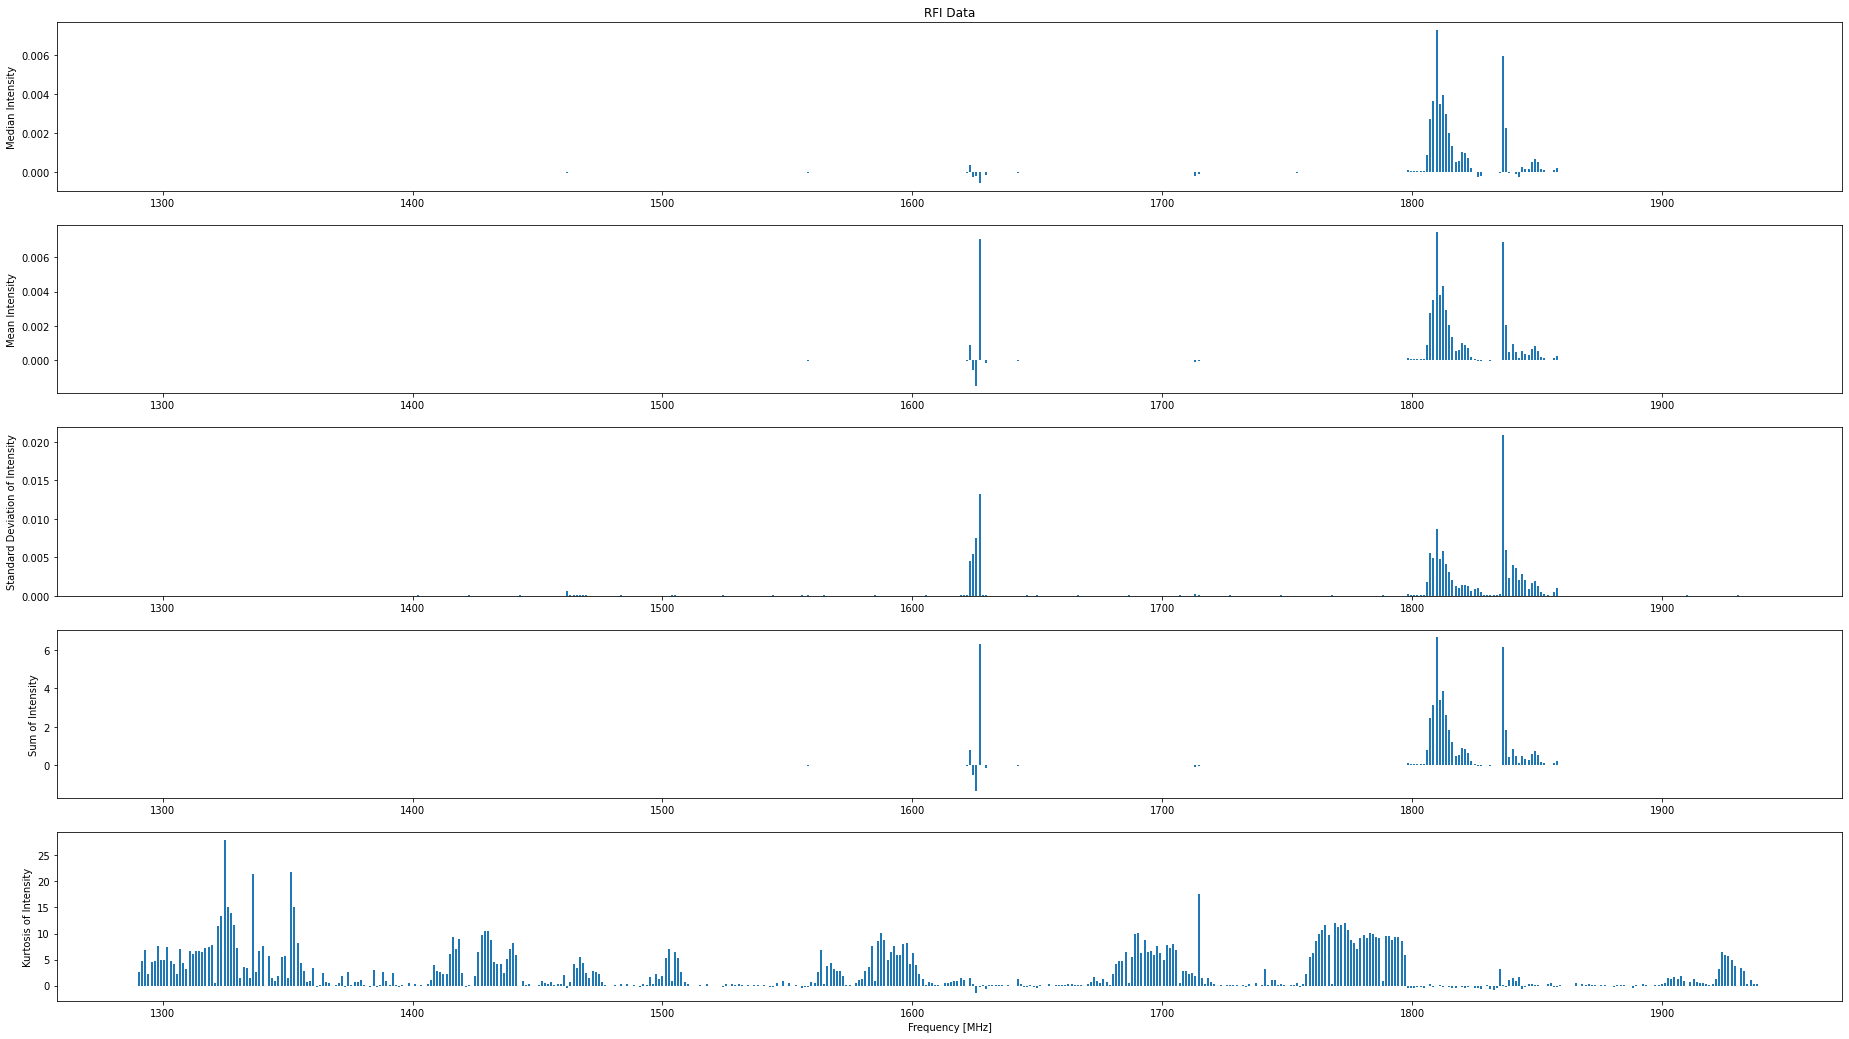

In [10]:
fig, axes = plt.subplots(5,figsize=(32,18))

#ax2 = axs[0, 0].secondary_xaxis("top", f)
#ax2 = axs[0, 1].secondary_xaxis("top", f)
#ax2.set_xlim(axs[0, 0].get_xlim())
#ax2.set_xlim(axs[0, 1].get_xlim())
#ax2.set_xticklabels(tick_function(freq_list2))
#ax2.set_xlabel("Frequency Channel [MHz]")

#ax2[0, 0].set_xlim(axs.get_xlim())
#ax2[0, 0].set_xticklabels(tick_function(freq_list2))
#ax2[0, 0].set_xlabel("Frequency Channel [MHz]")

#axes[0, 0].bar(freq_list_RFI, median_chn_RFI, width=8)
axes[0].bar(freq_mhz_RFI, median_chn_RFI1)
axes[0].set_title('RFI Data')
axes[0].set_ylabel('Median Intensity')
#axes[1].bar(freq_list_RFI, mean_chn_RFI, width=8)
axes[1].bar(freq_mhz_RFI, mean_chn_RFI1)
axes[1].set_ylabel('Mean Intensity')
#axes[2].bar(freq_list_RFI, std_chn_RFI, width=8)
axes[2].bar(freq_mhz_RFI, std_chn_RFI1)
axes[2].set_ylabel('Standard Deviation of Intensity')
#axes[3].bar(freq_list_RFI, sum_chn_RFI, width=8)
axes[3].bar(freq_mhz_RFI, sum_chn_RFI1)
axes[3].set_ylabel('Sum of Intensity')
#axes[4].bar(freq_list_RFI, kurtosis_chn_RFI, width=8)
axes[4].bar(freq_mhz_RFI, kurtosis_chn_RFI1)
axes[4].set_ylabel('Kurtosis of Intensity')
axes[4].set_xlabel('Frequency [MHz]')


#axes[0, 1].bar(freq_mhz_clean, median_chn2, width=8)
#axes[0, 1].set_title('Clean Data')
#axes[0, 1].set_ylabel('Median Intensity')
#axes[1, 1].bar(freq_mhz_clean, mean_chn, width=8)
#axes[1, 1].set_ylabel('Mean Intensity')
#axes[2, 1].bar(freq_mhz_clean, std_chn, width=8)
#axes[2, 1].set_ylabel('Standard Deviation of Intensity')
#axes[3, 1].bar(freq_mhz_clean, sum_chn, width=8)
#axes[3, 1].set_ylabel('Sum of Intensity')
#axes[4, 1].bar(freq_mhz_clean, kurtosis_chn, width=8)
#axes[4, 1].set_ylabel('Kurtosis of Intensity')
#axes[4, 1].set_xlabel('Frequency [MHz]')  
plt.show()

Plot the RFI and clean on the same plot.

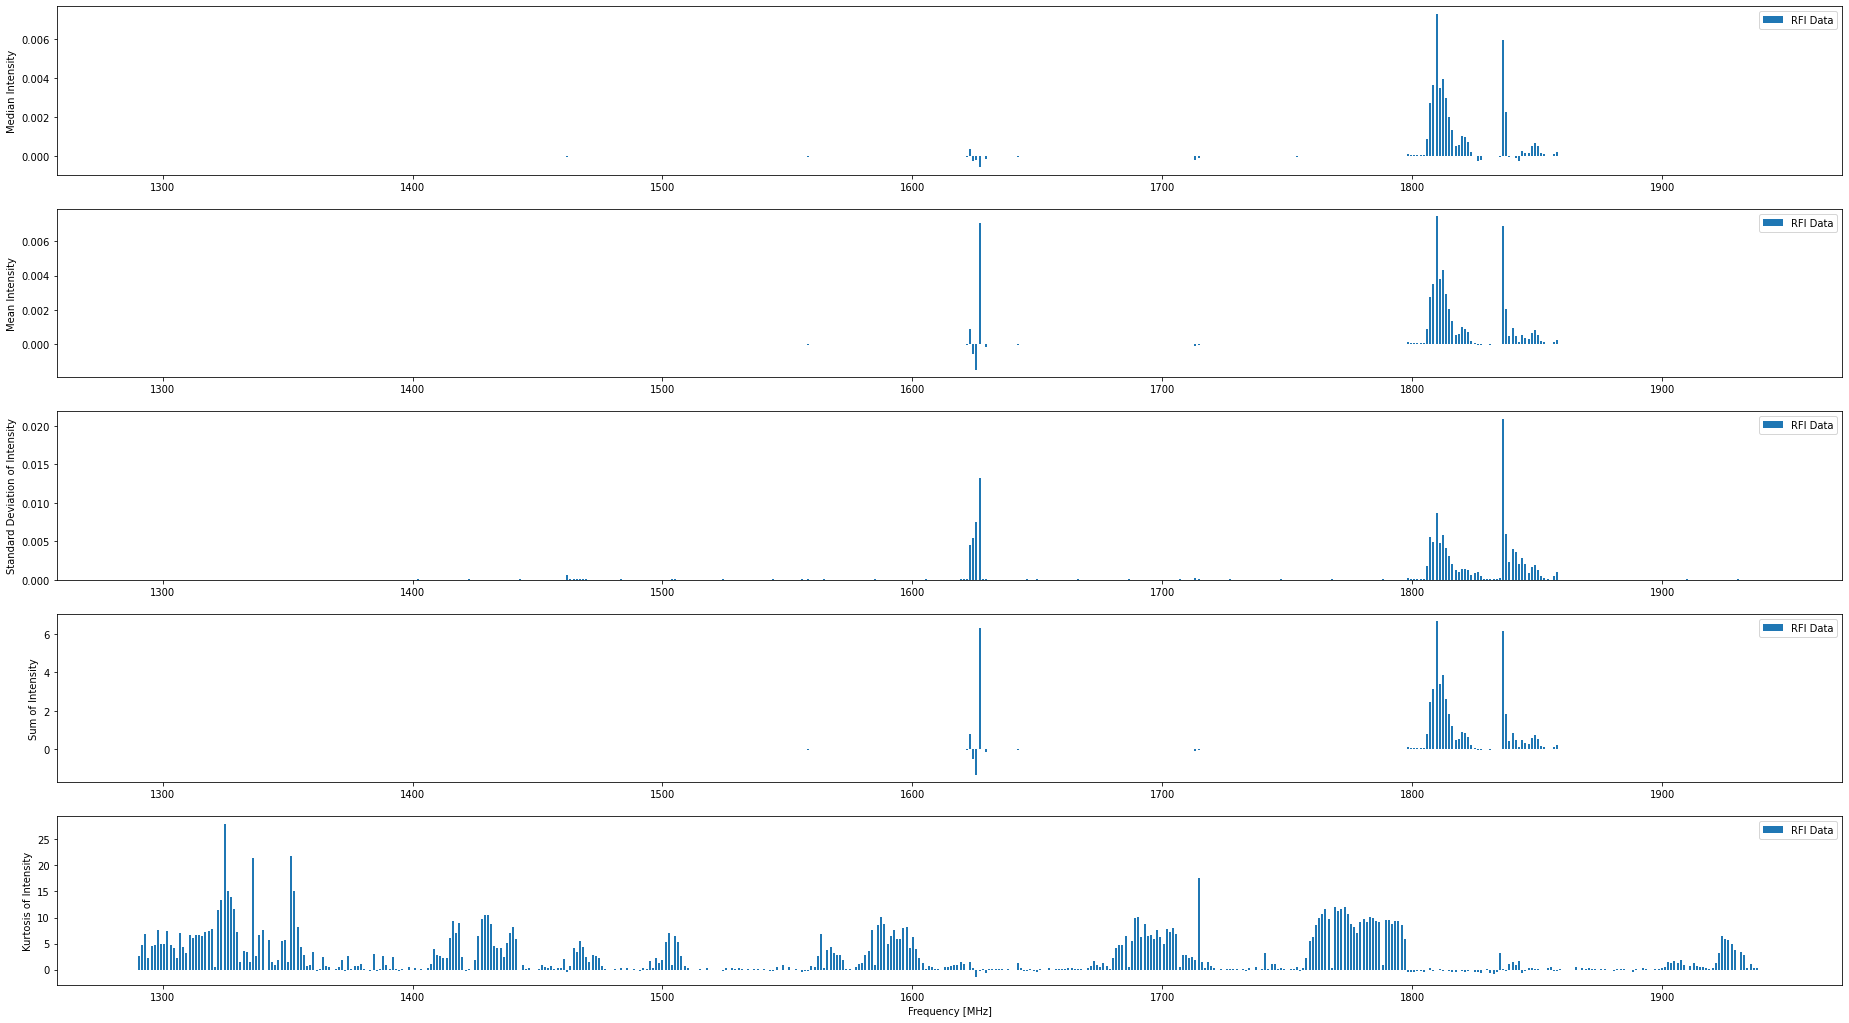

In [11]:
fig, axs = plt.subplots(5, figsize=(32,18))
axs[0].bar(freq_mhz_RFI, median_chn_RFI1, label='RFI Data', alpha=1)
axs[0].set_ylabel('Median Intensity')
axs[1].bar(freq_mhz_RFI, mean_chn_RFI1, label='RFI Data', alpha=1)
axs[1].set_ylabel('Mean Intensity')
axs[2].bar(freq_mhz_RFI, std_chn_RFI1, label='RFI Data', alpha=1)
axs[2].set_ylabel('Standard Deviation of Intensity')
axs[3].bar(freq_mhz_RFI, sum_chn_RFI1, label='RFI Data', alpha=1)
axs[3].set_ylabel('Sum of Intensity')
axs[4].bar(freq_mhz_RFI, kurtosis_chn_RFI1, label='RFI Data', alpha=1)
axs[4].set_ylabel('Kurtosis of Intensity')
axs[4].set_xlabel('Frequency [MHz]')

#axs[0].bar(freq_mhz_clean, median_chn2, label='Clean Data', alpha=0.5)
#axs[1].bar(freq_mhz_clean, mean_chn, label='Clean Data', alpha=0.5)
#axs[2].bar(freq_mhz_clean, std_chn, label='Clean Data', alpha=0.5)
#axs[3].bar(freq_mhz_clean, sum_chn, label='Clean Data', alpha=0.5)
#axs[4].bar(freq_mhz_clean, kurtosis_chn, label='Clean Data', alpha=0.5)
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
plt.show()

In [12]:
first_arr = list(freq_pulse1[0])
#Create an array to use as the x-axis
bin_nums = np.asarray(range(0,1024))

In [13]:
#Create a matrix for the mean
mean_matrix = []
mean_matrix.append(mean_bin_RFI1)
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI2]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI3]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI4]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI5]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI6]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI7]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI8]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI9]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI10]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI11]]
mean_matrix = np.r_[mean_matrix,[mean_bin_RFI12]]

#Create a matrix for the median
median_matrix = []
median_matrix.append(median_bin_RFI1)
median_matrix = np.r_[median_matrix,[median_bin_RFI2]]
median_matrix = np.r_[median_matrix,[median_bin_RFI3]]
median_matrix = np.r_[median_matrix,[median_bin_RFI4]]
median_matrix = np.r_[median_matrix,[median_bin_RFI5]]
median_matrix = np.r_[median_matrix,[median_bin_RFI6]]
median_matrix = np.r_[median_matrix,[median_bin_RFI7]]
median_matrix = np.r_[median_matrix,[median_bin_RFI8]]
median_matrix = np.r_[median_matrix,[median_bin_RFI9]]
median_matrix = np.r_[median_matrix,[median_bin_RFI10]]
median_matrix = np.r_[median_matrix,[median_bin_RFI11]]
median_matrix = np.r_[median_matrix,[median_bin_RFI12]]

#Create a matrix for the standard deviation
std_matrix = []
std_matrix.append(std_bin_RFI1)
std_matrix = np.r_[std_matrix,[std_bin_RFI2]]
std_matrix = np.r_[std_matrix,[std_bin_RFI3]]
std_matrix = np.r_[std_matrix,[std_bin_RFI4]]
std_matrix = np.r_[std_matrix,[std_bin_RFI5]]
std_matrix = np.r_[std_matrix,[std_bin_RFI6]]
std_matrix = np.r_[std_matrix,[std_bin_RFI7]]
std_matrix = np.r_[std_matrix,[std_bin_RFI8]]
std_matrix = np.r_[std_matrix,[std_bin_RFI9]]
std_matrix = np.r_[std_matrix,[std_bin_RFI10]]
std_matrix = np.r_[std_matrix,[std_bin_RFI11]]
std_matrix = np.r_[std_matrix,[std_bin_RFI12]]

#Create a matrix for the sum
sum_matrix = []
sum_matrix.append(sum_bin_RFI1)
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI2]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI3]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI4]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI5]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI6]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI7]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI8]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI9]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI10]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI11]]
sum_matrix = np.r_[sum_matrix,[sum_bin_RFI12]]

#Create a matrix for the kurtosis
kurtosis_matrix = []
kurtosis_matrix.append(kurtosis_bin_RFI1)
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI2]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI3]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI4]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI5]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI6]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI7]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI8]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI9]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI10]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI11]]
kurtosis_matrix = np.r_[kurtosis_matrix,[kurtosis_bin_RFI12]]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/lib/index_tricks.py:387: UserWarning: Warning: converting a masked element to nan.
  newobj = array(item, copy=False, subok=True, ndmin=ndmin)


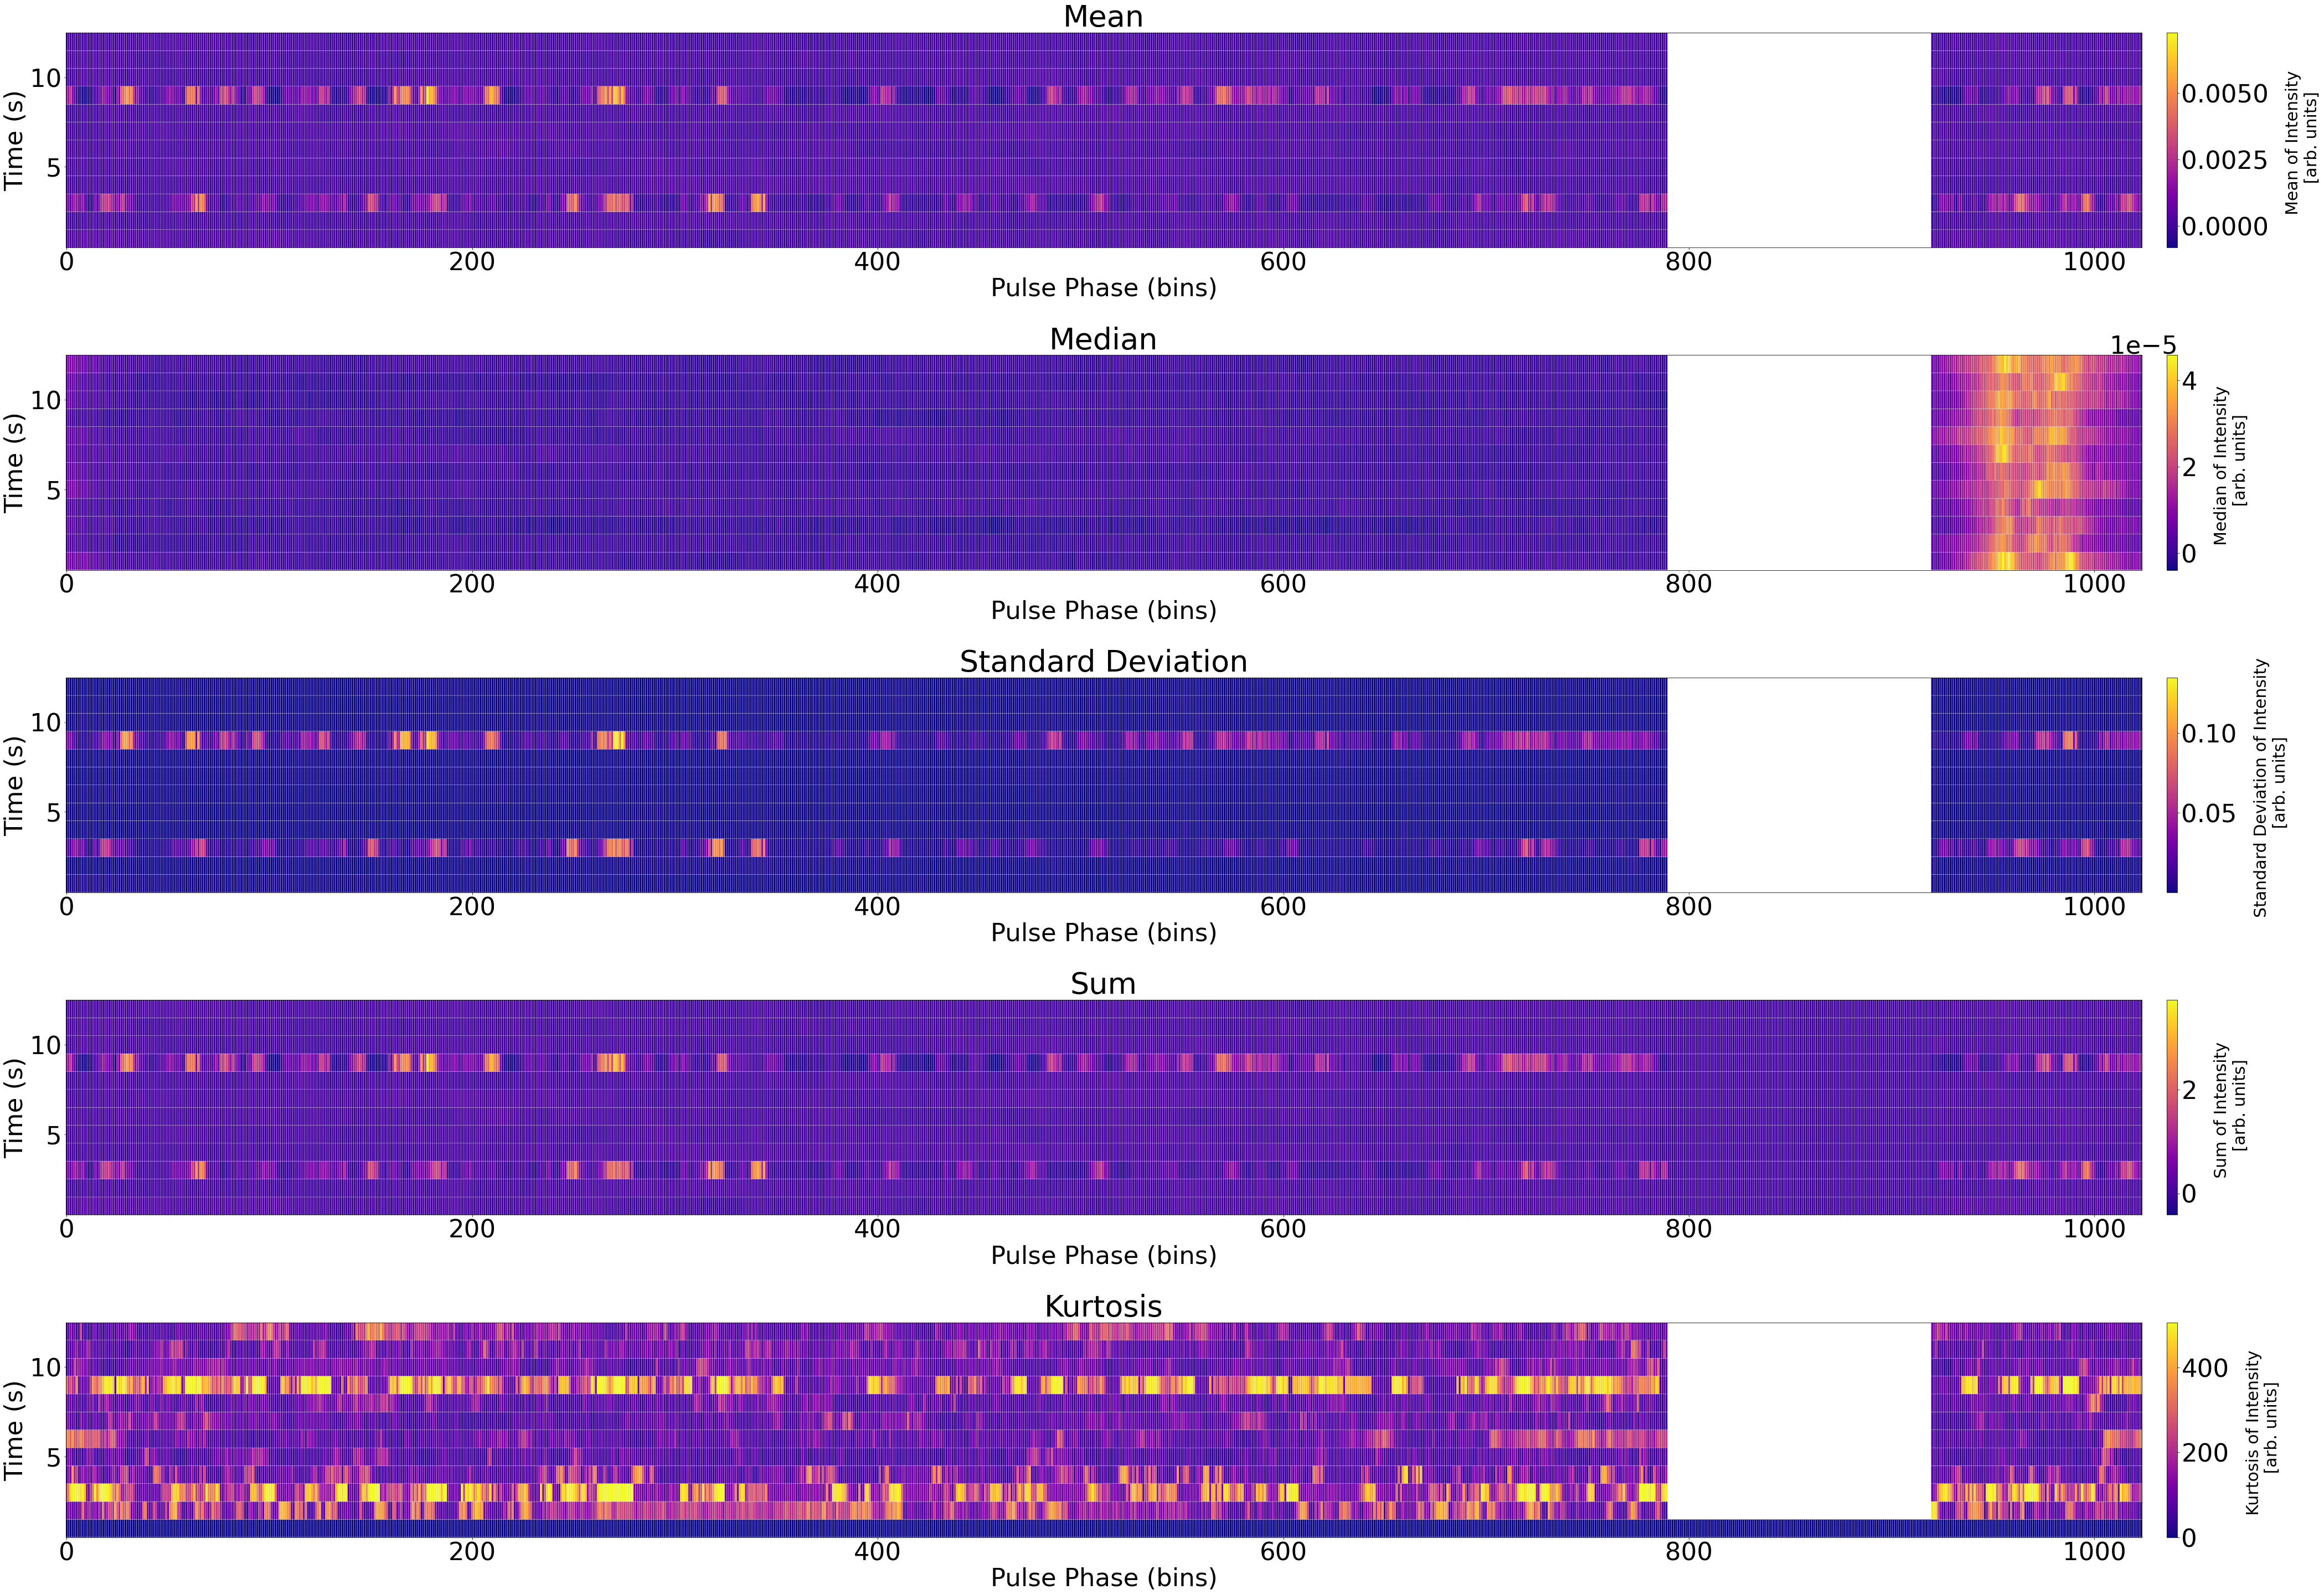

In [14]:
x = bin_nums
y = [1,2,3,4,5,6,7,8,9,10,11,12]

#x = np.reshape(x, (np.product(x.shape),))
#y = np.reshape(y, (np.product(y.shape),))

X,Y = np.meshgrid(x, y, indexing='ij')
Z_mean = np.transpose(mean_matrix)
Z_median = np.transpose(median_matrix)
Z_std = np.transpose(std_matrix)
Z_sum = np.transpose(sum_matrix)
Z_kurtosis = np.transpose(kurtosis_matrix)

fig = plt.figure(figsize=(80, 50))
fig.subplots_adjust(hspace=0.5)
plt.rcParams.update({'font.size': 45})
ax1 = fig.add_subplot(511)
pcm1 = ax1.pcolor(X, Y, Z_mean, edgecolors='w',cmap="plasma", shading='auto')
ax2 = fig.add_subplot(512)
pcm2 = ax2.pcolor(X, Y, Z_median, edgecolors='w',cmap="plasma", shading='auto')
ax3 = fig.add_subplot(513)
pcm3 = ax3.pcolor(X, Y, Z_std, edgecolors='w',cmap="plasma", shading='auto')
ax4 = fig.add_subplot(514)
pcm4 = ax4.pcolor(X, Y, Z_sum, edgecolors='w',cmap="plasma", shading='auto')
ax5 = fig.add_subplot(515)
pcm5 = ax5.pcolor(X, Y, Z_kurtosis, edgecolors='w',cmap="plasma", shading='auto')
ax1.set_xlabel('Pulse Phase (bins)')
ax2.set_xlabel('Pulse Phase (bins)')
ax3.set_xlabel('Pulse Phase (bins)')
ax4.set_xlabel('Pulse Phase (bins)')
ax5.set_xlabel('Pulse Phase (bins)')
ax1.set_ylabel('Time (s)')
ax2.set_ylabel('Time (s)')
ax3.set_ylabel('Time (s)')
ax4.set_ylabel('Time (s)')
ax5.set_ylabel('Time (s)')
ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title('Standard Deviation')
ax4.set_title('Sum')
ax5.set_title('Kurtosis')
cbar1 = fig.colorbar(pcm1, ax=ax1, pad=0.01)
cbar2 = fig.colorbar(pcm2, ax=ax2, pad=0.01)
cbar3 = fig.colorbar(pcm3, ax=ax3, pad=0.01)
cbar4 = fig.colorbar(pcm4, ax=ax4, pad=0.01)
cbar5 = fig.colorbar(pcm5, ax=ax5, pad=0.01)
cbar1.set_label("Mean of Intensity \n [arb. units]", fontsize=30, labelpad=30)
cbar2.set_label("Median of Intensity \n [arb. units]",  fontsize=30, labelpad=30)
cbar3.set_label("Standard Deviation of Intensity \n [arb. units]",  fontsize=30, labelpad=30)
cbar4.set_label("Sum of Intensity \n [arb. units]",  fontsize=30, labelpad=30)
cbar5.set_label("Kurtosis of Intensity \n [arb. units]",  fontsize=30, labelpad=30)
plt.show()

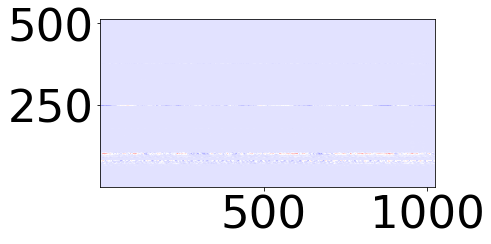

In [15]:
rows,cols = freq_pulse1.shape

plt.imshow(freq_pulse1, interpolation='nearest', 
                 extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
                 cmap='bwr')

### Pulse Phase Stats

In [16]:
off_pulse_list_RFI = []

#Select only off-pulse channels
for i in range(0,4608):
    off_pulse_list_RFI.append(np.concatenate((all_freq_chn_RFI[i][:790], buckets, all_freq_chn_RFI[i][920:])))
    #off_pulse_list_RFI.append(off_pulse[i][:])
    
#Transpose the original array
bin_list_RFI = np.transpose(off_pulse_list_RFI)

print(len(bin_list_RFI))

NameError: name 'all_freq_chn_RFI' is not defined

In [ ]:
#Create lists
mean_bin_RFI = []
median_bin_RFI = []
std_bin_RFI = []
sum_bin_RFI = []
kurtosis_bin_RFI = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI.append(np.nanmean(bin_list_RFI[i]))
    #Calculate the median for each bin
    median_bin_RFI.append(np.nanmedian(bin_list_RFI[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI.append(np.nanstd(bin_list_RFI[i]))
    #Calculate the sum for each bin
    sum_bin_RFI.append(np.nansum(bin_list_RFI[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI.append(stats.kurtosis(bin_list_RFI[i], nan_policy='omit'))

In [ ]:
#Create an array to use as the x-axis
bin_nums = np.asarray(range(0,1024))
print(np.shape(bin_nums))

In [ ]:
#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, median_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Median Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, mean_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Mean Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, std_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Standard Deviation of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, sum_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Sum of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, kurtosis_bin_RFI) #Value of 0 is normal distribution
plt.xlabel('Bin Number')
plt.ylabel('Kurtosis of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()